<a href="https://colab.research.google.com/github/LeoFreitas1995/ARCA---Module-of-Clustering/blob/master/OPTICS_TRIPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import csv
import time
from sklearn.cluster import OPTICS
from google.colab import files
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
%matplotlib inline

In [2]:
uploaded = files.upload()

Saving TripsNormalizada.csv to TripsNormalizada.csv


In [0]:
df= pd.read_csv('TripsNormalizada.csv')
db = df
db = db.iloc[0:30000]
# db

In [170]:
a = db.isnull().sum()
b = db.isna().sum()

print(a, b)

Moid               0
Tripid             0
Tstart             0
Tend               0
Xstart             0
Ystart             0
Xend               0
Yend               0
TstartTimestamp    0
TendTimestamp      0
dtype: int64 Moid               0
Tripid             0
Tstart             0
Tend               0
Xstart             0
Ystart             0
Xend               0
Yend               0
TstartTimestamp    0
TendTimestamp      0
dtype: int64


In [0]:
time_start = db.iloc[:,8:9]
time_start
routes = db.iloc[:,4:6]
routes

In [0]:
# min_samples=47 time
#TESTANDO O MELHOR PARÂMETRO
def melhor_d(v1, novo):
  if(v1 > novo):
    return True
  return False
def melhor_c(v1, novo):
  if(v1 < novo):
    return True
  return False

m_davies = 100000000
m_calin = 0

index = 0

data = routes

for i in range(5, 10):
  clustering = OPTICS(max_eps=0.5, min_samples=i).fit(data)
  labels = clustering.labels_
  # db['Groups'] = clustering.labels_

  #metrics avaliable
  davies = davies_bouldin_score(data, labels)
  calin = metrics.calinski_harabasz_score(data, labels)

  if(melhor_d(m_davies, davies) and melhor_c(m_calin, calin)):
    m_davies = davies
    m_calin = calin
    index = i


print(index, " = ",m_davies, m_calin)

In [172]:
#10000 lines the best value of min_samples is 47
#30000 lines the best value of min_samples is 137
clustering = OPTICS(max_eps=300, min_samples=137).fit(time_start)
labels = clustering.labels_
db['GroupsTstart'] = clustering.labels_


davies = davies_bouldin_score(time_start, labels)
calin = metrics.calinski_harabasz_score(time_start, labels)

print(davies, calin)

0.7361396964579532 108631.36120982992


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


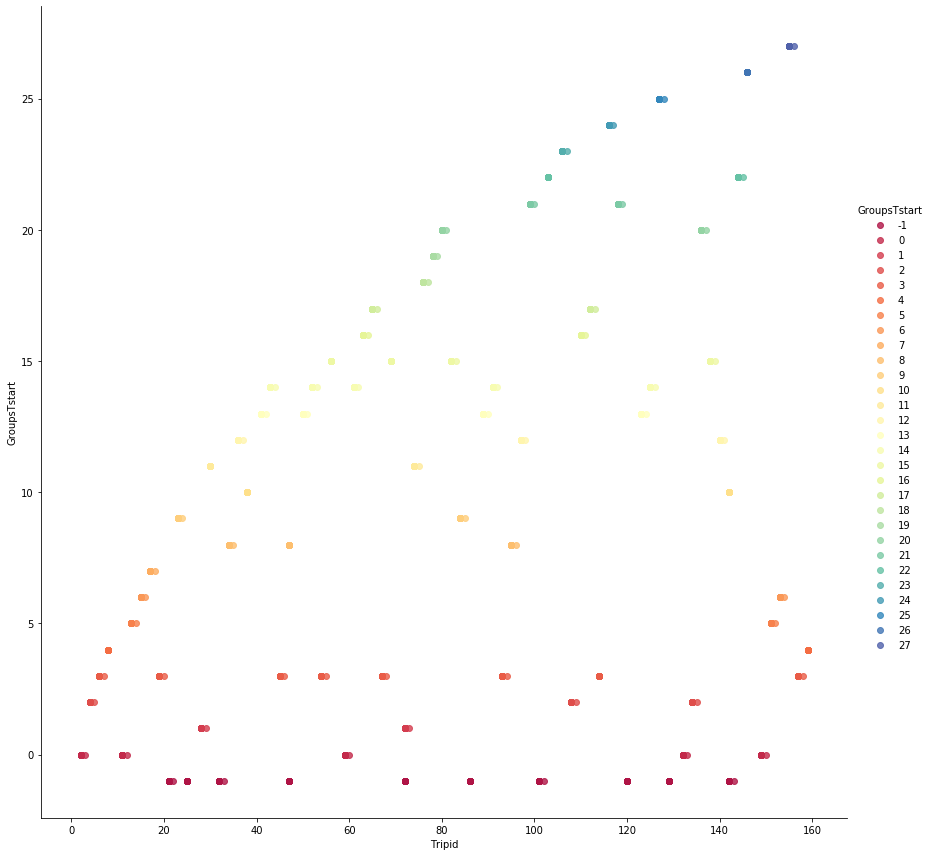

In [179]:
sb.lmplot( x='Tripid', y='GroupsTstart', data=db, fit_reg=None, height=12, hue='GroupsTstart', legend=True, legend_out=True, palette="Spectral")

In [0]:
groups_per_time = []

for i in range(0,clustering.labels_.max()):
  groups_per_time.append(db.loc[db['GroupsTstart'] == i])
  routes = groups_per_time[i].iloc[:,4:6]
  
  clustering_routes = OPTICS(max_eps=.0007, min_samples=9).fit(routes)
  labels = clustering_routes.labels_
  groups_per_time[i]['GroupsRoutes'] = labels

  davies = davies_bouldin_score(routes, labels)
  calin = metrics.calinski_harabasz_score(routes, labels)
  print('Index = ', i)
  print(davies, calin)
  
print("Done")